## 04 – Model Comparison & Insights

This notebook compares all trained models (Custom CNN, ResNet50, MobileNetV2, EfficientNetB0) using saved metric CSVs and saved model evaluation outputs.  
Deliverables:
- Comparison table (CSV)
- Bar charts (Accuracy, F1, Precision, Recall)
- Per-class comparison
- Misclassification visualization (example)
- Final recommendation summary

#Basic Imports

In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image as IPImage

## Mount Drive & Set Paths

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Define base paths

In [46]:
BASE_DIR = "/content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection"

REPORTS_DIR = os.path.join(BASE_DIR, "reports", "model_comparison")
MODELS_DIR = os.path.join(BASE_DIR, "models")
DATA_DIR = os.path.join(BASE_DIR, "data", "classification_dataset")

os.makedirs(REPORTS_DIR, exist_ok=True)

print("Base:", BASE_DIR)
print("Reports:", REPORTS_DIR)
print("Models:", MODELS_DIR)
print("Data:", DATA_DIR)

Base: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection
Reports: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison
Models: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/models
Data: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/data/classification_dataset


## 2. Load Metrics CSVs

We try to load both the transfer-learning metrics CSV and the custom CNN metrics CSV.  
If files are missing, the code will attempt to assemble metrics from available dictionaries saved earlier.


In [47]:
tl_metrics_path =os.path.join(REPORTS_DIR, "transfer_learning_metrics.csv")

In [48]:
if not os.path.exists(tl_metrics_path):
    raise FileNotFoundError(f"transfer_learning_metrics.csv not found at: {tl_metrics_path}")

df_tl = pd.read_csv(tl_metrics_path)
print("Loaded TL metrics.")

metrics_df = df_tl.copy()   # directly use TL CSV
metrics_df

Loaded TL metrics.


,model,overall_accuracy,bird_precision,bird_recall,bird_f1,drone_precision,drone_recall,drone_f1,weighted_precision,weighted_recall,weighted_f1
0,Custom_CNN,0.893023,0.876923,0.942149,0.908367,0.917647,0.829787,0.871508,0.894728,0.893023,0.892252
1,ResNet50,0.874419,0.873016,0.909091,0.890688,0.876404,0.829787,0.852459,0.874497,0.874419,0.873974
2,MobileNetV2,0.976744,0.967742,0.991736,0.979592,0.989011,0.957447,0.972973,0.977041,0.976744,0.976698
3,EfficientNetB0,0.981395,0.983471,0.983471,0.983471,0.978723,0.978723,0.978723,0.981395,0.981395,0.981395


## Normalize Columns

In [49]:
#  Clean Column Types

expected_cols = [
    'overall_accuracy',
    'bird_precision', 'bird_recall', 'bird_f1',
    'drone_precision', 'drone_recall', 'drone_f1',
    'weighted_precision', 'weighted_recall', 'weighted_f1'
]

for col in expected_cols:
    if col not in metrics_df.columns:
        metrics_df[col] = np.nan

metrics_df[expected_cols] = metrics_df[expected_cols].astype(float)

# Create weighted F1 alias
metrics_df['f1_weighted'] = metrics_df['weighted_f1']

metrics_df


,model,overall_accuracy,bird_precision,bird_recall,bird_f1,drone_precision,drone_recall,drone_f1,weighted_precision,weighted_recall,weighted_f1,f1_weighted
0,Custom_CNN,0.893023,0.876923,0.942149,0.908367,0.917647,0.829787,0.871508,0.894728,0.893023,0.892252,0.892252
1,ResNet50,0.874419,0.873016,0.909091,0.890688,0.876404,0.829787,0.852459,0.874497,0.874419,0.873974,0.873974
2,MobileNetV2,0.976744,0.967742,0.991736,0.979592,0.989011,0.957447,0.972973,0.977041,0.976744,0.976698,0.976698
3,EfficientNetB0,0.981395,0.983471,0.983471,0.983471,0.978723,0.978723,0.978723,0.981395,0.981395,0.981395,0.981395


## Save Unified Summary CSV

In [50]:
#  Save Clean Summary CSV

summary_csv = os.path.join(REPORTS_DIR, "model_comparison_summary.csv")
metrics_df.to_csv(summary_csv, index=False)

print("Saved model comparison summary to:")
print(summary_csv)

metrics_df


Saved model comparison summary to:
/content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison/model_comparison_summary.csv


,model,overall_accuracy,bird_precision,bird_recall,bird_f1,drone_precision,drone_recall,drone_f1,weighted_precision,weighted_recall,weighted_f1,f1_weighted
0,Custom_CNN,0.893023,0.876923,0.942149,0.908367,0.917647,0.829787,0.871508,0.894728,0.893023,0.892252,0.892252
1,ResNet50,0.874419,0.873016,0.909091,0.890688,0.876404,0.829787,0.852459,0.874497,0.874419,0.873974,0.873974
2,MobileNetV2,0.976744,0.967742,0.991736,0.979592,0.989011,0.957447,0.972973,0.977041,0.976744,0.976698,0.976698
3,EfficientNetB0,0.981395,0.983471,0.983471,0.983471,0.978723,0.978723,0.978723,0.981395,0.981395,0.981395,0.981395


## Plot Accuracy & Weighted F1

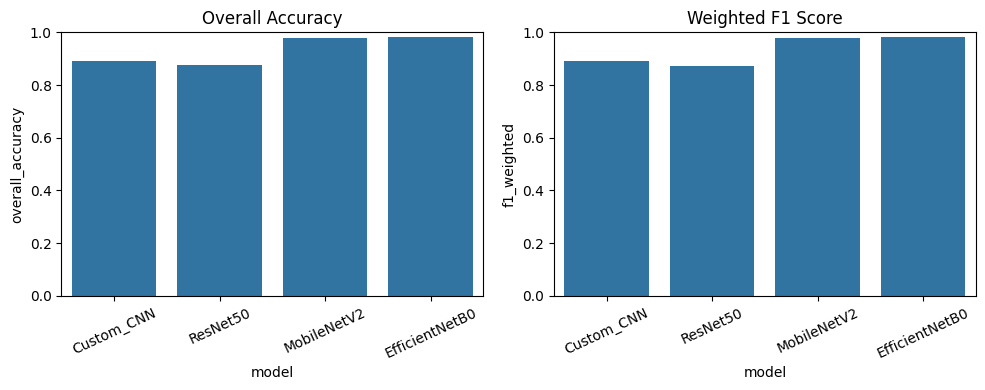

Saved figure to: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison/accuracy_f1_comparison.png


In [51]:
#  Plot accuracy & F1

plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
sns.barplot(data=metrics_df, x='model', y='overall_accuracy')
plt.title("Overall Accuracy")
plt.ylim(0,1)
plt.xticks(rotation=25)

# Weighted F1
plt.subplot(1,2,2)
sns.barplot(data=metrics_df, x='model', y='f1_weighted')
plt.title("Weighted F1 Score")
plt.ylim(0,1)
plt.xticks(rotation=25)

plt.tight_layout()
plot_path = os.path.join(REPORTS_DIR, "accuracy_f1_comparison.png")
plt.savefig(plot_path, dpi=150)
plt.show()

print("Saved figure to:", plot_path)


## Per-Class F1 Score Comparison

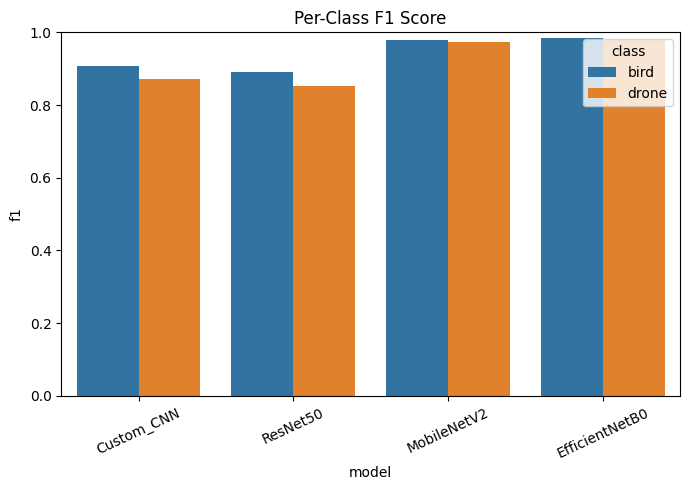

Saved per-class comparison to: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison/per_class_f1.png


In [52]:
#  Per-Class F1 (Bird vs Drone)

rows = []

for _, r in metrics_df.iterrows():
    rows.append({"model": r["model"], "class": "bird", "f1": r["bird_f1"]})
    rows.append({"model": r["model"], "class": "drone", "f1": r["drone_f1"]})

per_class_df = pd.DataFrame(rows)

plt.figure(figsize=(7,5))
sns.barplot(data=per_class_df, x="model", y="f1", hue="class")
plt.ylim(0,1)
plt.title("Per-Class F1 Score")
plt.xticks(rotation=25)
plt.tight_layout()

per_class_plot = os.path.join(REPORTS_DIR, "per_class_f1.png")
plt.savefig(per_class_plot, dpi=150)
plt.show()

print("Saved per-class comparison to:", per_class_plot)


## Select Best Model for Deployment

We automatically choose the model with the highest **weighted F1** for deployment because it balances precision & recall across classes.  
If you prefer a lighter *edge* model (for faster inference or smaller size), set `PREFER_LIGHTWEIGHT = True` and the script will prefer `MobileNetV2` if its performance is near the top.

The chosen model name and its path will be saved to:
- `reports/model_comparison/selected_model.json`
- `reports/model_comparison/selected_model.txt`

In [53]:
import json, os
from pathlib import Path

# -------- CONFIG --------
PREFER_LIGHTWEIGHT = False   # set True if you want a lightweight model for edge deployment
PERFORMANCE_MARGIN = 0.01    # allow lightweight model if its weighted F1 is within this margin of the best
# ------------------------

# model file mapping (use Path for cross-platform safety)
model_file_map = {
    "Custom_CNN": os.path.join(MODELS_DIR, "custom_cnn_best.keras"),
    "ResNet50": os.path.join(MODELS_DIR, "resnet50_best.keras"),
    "MobileNetV2": os.path.join(MODELS_DIR, "mobilenetv2_best.keras"),
    "EfficientNetB0": os.path.join(MODELS_DIR, "efficientnetb0_best.keras"),
}

# Ensure metrics_df exists
if 'metrics_df' not in globals():
    raise RuntimeError("metrics_df not found. Run the comparison cells to build metrics_df before selecting a model.")

# --- 1) figure out which column stores weighted F1 (support a few common names)
possible_weighted_f1_cols = ['weighted_f1','f1_weighted','f1-score_weighted','f1-weighted','weighted avg_f1','weighted avg f1','weighted avg','weighted avg f1']
weighted_col = None
for c in possible_weighted_f1_cols:
    if c in metrics_df.columns:
        weighted_col = c
        break

# fallback: try to detect any column that contains 'f1' and 'weight' substring
if weighted_col is None:
    for c in metrics_df.columns:
        cname = c.lower().replace(" ", "_")
        if 'f1' in cname and ('weight' in cname or 'weighted' in cname):
            weighted_col = c
            break

if weighted_col is None:
    raise KeyError("Could not find a weighted-F1 column in metrics_df. Columns present:\n" + ", ".join(metrics_df.columns))

# --- 2) pick best by weighted F1
metrics_df_clean = metrics_df.copy()
metrics_df_clean[weighted_col] = pd.to_numeric(metrics_df_clean[weighted_col], errors='coerce')
if metrics_df_clean[weighted_col].isnull().all():
    raise ValueError(f"Weighted-F1 column '{weighted_col}' contains only NaNs.")

best_row = metrics_df_clean.sort_values(weighted_col, ascending=False).iloc[0]
best_model = best_row['model']
best_f1 = float(best_row[weighted_col])

# --- 3) consider lightweight option (MobileNetV2) if requested
chosen_model = best_model
rationale = f"Selected best by weighted F1: {best_model} ({weighted_col}={best_f1:.4f})."

if PREFER_LIGHTWEIGHT and 'MobileNetV2' in metrics_df_clean['model'].values:
    mob_row = metrics_df_clean[metrics_df_clean['model']=='MobileNetV2'].iloc[0]
    mob_f1 = float(mob_row[weighted_col])
    if mob_f1 + PERFORMANCE_MARGIN >= best_f1:
        chosen_model = 'MobileNetV2'
        rationale = (f"PREFER_LIGHTWEIGHT=True and MobileNetV2 weighted F1 ({mob_f1:.4f}) "
                     f"is within {PERFORMANCE_MARGIN} of best ({best_f1:.4f}). Choosing MobileNetV2 for deployment.")
    else:
        rationale = (f"PREFER_LIGHTWEIGHT=True but MobileNetV2 weighted F1 ({mob_f1:.4f}) "
                     f"is not within {PERFORMANCE_MARGIN} of best ({best_f1:.4f}). Choosing {best_model}.")

# --- 4) resolve chosen model file path using model_file_map
if chosen_model in model_file_map:
    raw_path = model_file_map[chosen_model]
else:
    raw_path = None

if raw_path is None:
    chosen_model_path = None
    rationale += " No model_file_map entry for chosen model."
else:
    # Accept either absolute or relative entries in model_file_map
    # If raw_path is relative (starts with './' or 'models/'), resolve against BASE_DIR
    raw_path_str = str(raw_path)
    if raw_path_str.startswith("./"):
        chosen_model_path = str((Path(BASE_DIR) / raw_path_str[2:]).resolve())
    elif raw_path_str.startswith("models/") or raw_path_str.startswith("models\\"):
        chosen_model_path = str((Path(BASE_DIR) / raw_path_str).resolve())
    else:
        # If it's already absolute or a path object, make absolute string
        chosen_model_path = str(Path(raw_path_str).resolve())

# --- 5) check existence and size
file_exists = False
file_size_mb = None
if chosen_model_path:
    file_exists = os.path.exists(chosen_model_path)
    if file_exists:
        file_size_mb = os.path.getsize(chosen_model_path) / (1024*1024)

# --- 6) save selection artifacts
selection = {
    "chosen_model": chosen_model,
    "chosen_model_path": "./models/" + os.path.basename(chosen_model_path) if chosen_model_path else None,  # store relative path in JSON
    "chosen_model_weighted_f1": float(metrics_df_clean[metrics_df_clean['model'] == chosen_model][weighted_col].iloc[0]) if chosen_model in metrics_df_clean['model'].values else None,
    "rationale": rationale,
    "prefer_lightweight": PREFER_LIGHTWEIGHT
}

json_path = os.path.join(REPORTS_DIR, "selected_model.json")
txt_path = os.path.join(REPORTS_DIR, "selected_model.txt")

os.makedirs(REPORTS_DIR, exist_ok=True)
with open(json_path, "w") as f:
    json.dump(selection, f, indent=4)

with open(txt_path, "w") as f:
    f.write(f"chosen_model: {chosen_model}\n")
    f.write(f"chosen_model_path: {selection['chosen_model_path']}\n")
    f.write(f"chosen_model_weighted_f1: {selection['chosen_model_weighted_f1']}\n")
    f.write(f"rationale: {rationale}\n")
    f.write(f"prefer_lightweight: {PREFER_LIGHTWEIGHT}\n")

# --- 7) print summary
print("✅ Deployment selection saved to:", json_path)
print("Chosen model:", chosen_model)
print("Rationale:", rationale)
if chosen_model_path:
    print("Resolved absolute model file path:", chosen_model_path)
    if file_exists:
        print(f"Model file exists. Size: {file_size_mb:.2f} MB")
    else:
        print("Warning: model file not found at resolved path. Ensure model saved under MODELS_DIR with expected filename.")
else:
    print("Warning: No file mapping for chosen model—update `model_file_map` with the correct filename in MODELS_DIR.")


✅ Deployment selection saved to: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison/selected_model.json
Chosen model: EfficientNetB0
Rationale: Selected best by weighted F1: EfficientNetB0 (weighted_f1=0.9814).
Resolved absolute model file path: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/models/efficientnetb0_best.keras
Model file exists. Size: 20.40 MB


## Error Analysis — Show Misclassified Examples

We will:
1. Load the selected deployment model (from `selected_model.json` saved earlier).  
2. Recreate the test generator (same preprocessing used for evaluation).  
3. Run predictions on the entire test set.  
4. Identify misclassified images (true label != predicted label).  
5. Save the list of misclassified filepaths to `reports/model_comparison/misclassified_examples.txt`.  
6. Display up to `N` misclassified examples (image, true label, predicted label, confidence).

This helps you visualize failure modes (small objects, occlusion, blur, confusing backgrounds).

Selected model: EfficientNetB0
Model file: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/models/efficientnetb0_best.keras
Using preprocessing for: EfficientNetB0
Found 215 images belonging to 2 classes.
Test generator created. Samples: 215 Class indices: {'bird': 0, 'drone': 1}
Loading model (compile=False)...
Model loaded.
Running predictions on test set...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Total: 215  Misclassified: 4
Saved misclassified list: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison/misclassified_examples.txt
Saved misclassified CSV: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison/misclassified_examples.csv


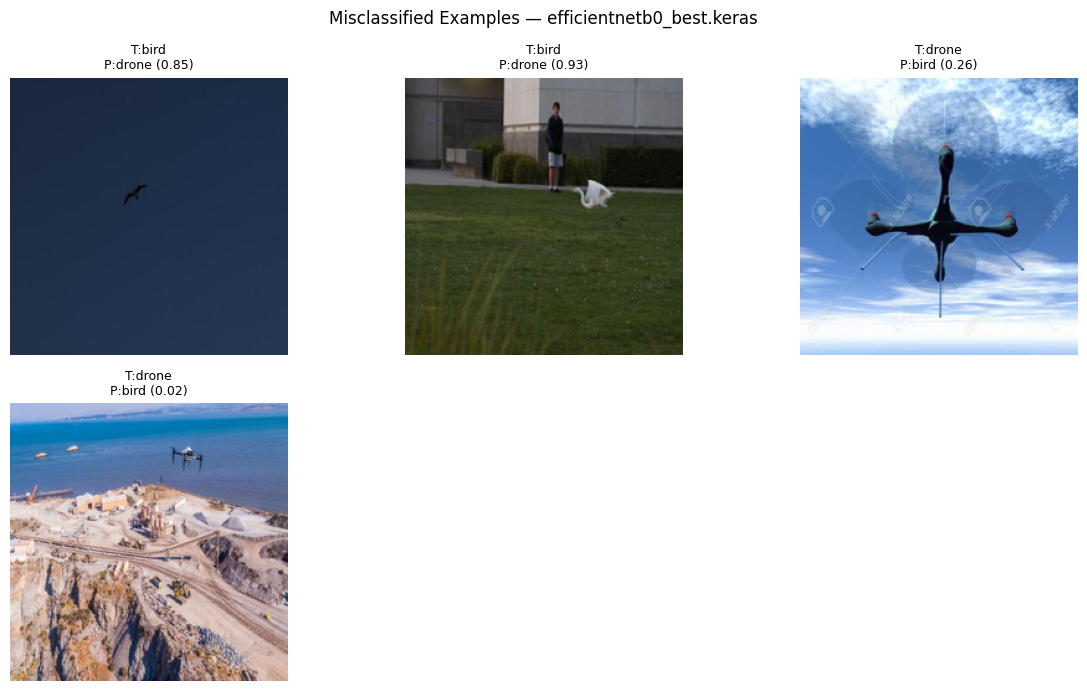


Done — misclassified examples saved and sample displayed. Inspect the CSV / images to understand failure modes.


In [54]:
#Error Analysis (EfficientNet-aware, robust)
import os, json, math, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


os.makedirs(REPORTS_DIR, exist_ok=True)

N_EXAMPLES_TO_DISPLAY = 12
CONFIDENCE_THRESHOLD = 0.5

# 1) Load selection info (chosen model name & path) saved earlier (fallback to best guess)
selection_json = os.path.join(REPORTS_DIR, "selected_model.json")
selected_info = None
if os.path.exists(selection_json):
    with open(selection_json, "r") as f:
        selected_info = json.load(f)
else:
    # fallback: try to infer from models directory
    cand_models = [f for f in os.listdir(MODELS_DIR) if f.endswith((".keras", ".h5", ".tf", ".ckpt")) or f.lower().endswith(".h5")]
    prefer = ["efficientnetb0_best.keras","resnet50_best.keras","mobilenetv2_best.keras","custom_cnn_best.keras"]
    chosen = None
    for p in prefer:
        if p in cand_models:
            chosen = p
            break
    if chosen is None and len(cand_models)>0:
        chosen = cand_models[0]
    if chosen:
        selected_info = {"chosen_model": chosen.split("_best")[0].replace(".keras",""), "chosen_model_path": os.path.join(MODELS_DIR, chosen)}

if selected_info is None:
    raise FileNotFoundError("No selected_model.json and no model file found in MODELS_DIR. Please set selected_model.json or place a model in MODELS_DIR.")

chosen_model = selected_info.get("chosen_model") or selected_info.get("model_name") or ""
chosen_model_path = selected_info.get("chosen_model_path") or selected_info.get("model_path") or selected_info.get("model_file")

# resolve if just a filename
if chosen_model_path and not os.path.exists(chosen_model_path):
    # search MODELS_DIR for match
    for fname in os.listdir(MODELS_DIR):
        if chosen_model.lower() in fname.lower():
            chosen_model_path = os.path.join(MODELS_DIR, fname)
            break

if not chosen_model_path or not os.path.exists(chosen_model_path):
    raise FileNotFoundError(f"Model file not found: {chosen_model_path}. Place your model in {MODELS_DIR} or update selected_model.json.")

print("Selected model:", chosen_model)
print("Model file:", chosen_model_path)

#  pick preprocessing fn based on model name
def pick_pre_fn(name):
    if not name:
        return None
    n = name.lower()
    if "efficient" in n:
        return efficientnet_preprocess
    if "mobilenet" in n:
        return mobilenet_preprocess
    if "resnet" in n:
        return resnet_preprocess
    return None

pre_fn = pick_pre_fn(chosen_model)
if pre_fn is None:
    print("No model-specific preprocess found; using rescale=1./255 fallback.")
    use_pre_fn = False
else:
    use_pre_fn = True
    print(f"Using preprocessing for: {chosen_model}")

# Build test generator using correct preprocessing
IMG_SIZE = (224,224)
BATCH = 32

test_dir = os.path.join(DATA_DIR, "test")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test dir not found: {test_dir}")

if use_pre_fn:
    test_datagen = ImageDataGenerator(preprocessing_function=pre_fn)
else:
    test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode="binary",
    shuffle=False
)

print("Test generator created. Samples:", test_gen.samples, "Class indices:", test_gen.class_indices)

# load model
print("Loading model (compile=False)...")
model = load_model(chosen_model_path, compile=False)
print("Model loaded.")

# predict
print("Running predictions on test set...")
y_prob = model.predict(test_gen, verbose=1).ravel()
y_pred = (y_prob >= CONFIDENCE_THRESHOLD).astype(int)
y_true = test_gen.classes
filepaths = np.array([os.path.join(test_dir, p) for p in test_gen.filenames])

# misclassified indices
mis_idx = np.where(y_pred != y_true)[0]
print(f"Total: {len(y_true)}  Misclassified: {len(mis_idx)}")

# save misclassified list (txt)
txt_out = os.path.join(REPORTS_DIR, "misclassified_examples.txt")
with open(txt_out, "w") as f:
    for i in mis_idx:
        f.write(f"{filepaths[i]}\ttrue:{test_gen.class_indices and list(test_gen.class_indices.keys())[list(test_gen.class_indices.values()).index(y_true[i])]}\tpred:{test_gen.class_indices and list(test_gen.class_indices.keys())[list(test_gen.class_indices.values()).index(y_pred[i])]}\tprob:{y_prob[i]:.4f}\n")
print("Saved misclassified list:", txt_out)

# save misclassified CSV
csv_out = os.path.join(REPORTS_DIR, "misclassified_examples.csv")
df = pd.DataFrame({
    "filepath": filepaths[mis_idx],
    "true_label": y_true[mis_idx],
    "pred_label": y_pred[mis_idx],
    "prob": y_prob[mis_idx]
})
# map numeric to str labels
# 6) Map class indices back to class names
inv_map = {v:k for k,v in test_gen.class_indices.items()}
df["true_label_str"] = df["true_label"].map(inv_map)
df["pred_label_str"] = df["pred_label"].map(inv_map)
df.to_csv(csv_out, index=False)
print("Saved misclassified CSV:", csv_out)

# display up to N_EXAMPLES_TO_DISPLAY misclassified images
if len(mis_idx) == 0:
    print("No misclassified examples found.")
else:
    show_idx = mis_idx[:N_EXAMPLES_TO_DISPLAY]
    cols = 3
    rows = math.ceil(len(show_idx) / cols)
    plt.figure(figsize=(cols*4, rows*3.5))
    for k, idx in enumerate(show_idx):
        img_path = filepaths[idx]
        try:
            img = Image.open(img_path).convert("RGB").resize(IMG_SIZE)
        except Exception as e:
            print("Failed to open:", img_path, e)
            continue
        true_lbl = inv_map[y_true[idx]]
        pred_lbl = inv_map[y_pred[idx]]
        conf = y_prob[idx]
        plt.subplot(rows, cols, k+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"T:{true_lbl}\nP:{pred_lbl} ({conf:.2f})", fontsize=9)
    plt.suptitle(f"Misclassified Examples — {os.path.basename(chosen_model_path)}", fontsize=12)
    plt.tight_layout()
    plt.show()


# final summary
print("\nDone — misclassified examples saved and sample displayed. Inspect the CSV / images to understand failure modes.")


## Confusion Matrix

Saved confusion matrix counts CSV: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison/confusion_matrix_counts.csv

Classification report:

              precision    recall  f1-score   support

        bird     0.9835    0.9835    0.9835       121
       drone     0.9787    0.9787    0.9787        94

    accuracy                         0.9814       215
   macro avg     0.9811    0.9811    0.9811       215
weighted avg     0.9814    0.9814    0.9814       215

Accuracy: 0.9814


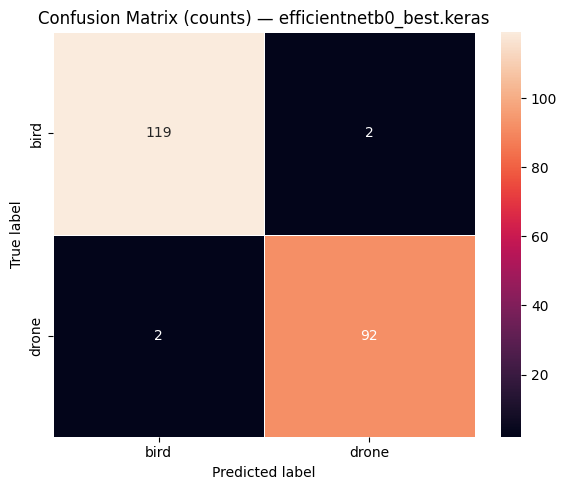

Saved confusion matrix image: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison/confusion_matrix_counts.png
Saved normalized confusion matrix CSV: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison/confusion_matrix_normalized.csv


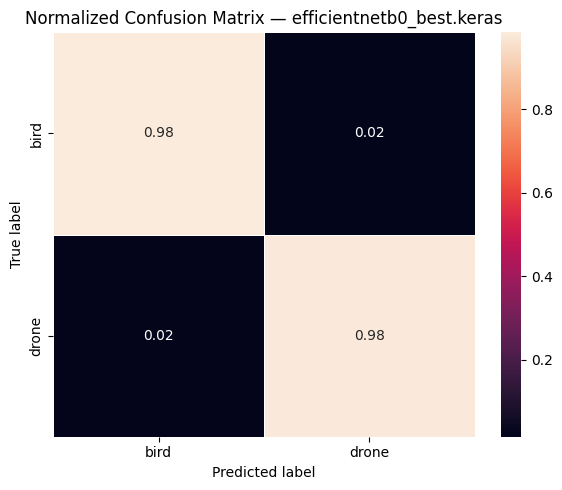

Saved normalized confusion matrix image: /content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison/confusion_matrix_normalized.png


In [55]:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

# Helper: get string labels in index order
inv_map = {v: k for k, v in test_gen.class_indices.items()}
labels = [inv_map[i] for i in range(len(inv_map))]

# If model predicted probabilities for multi-class, convert to class indices
# Handles cases where y_prob is (N,) (binary prob of class 1) or (N, C) (multi-class probs)
if y_prob is None:
    raise ValueError("y_prob is None — ensure model.predict returned probabilities.")
if getattr(y_prob, "ndim", 1) == 1:
    # binary-prob vector -> y_pred already created using threshold
    y_pred_idx = y_pred
else:
    # multi-class probability matrix -> take argmax
    y_pred_idx = np.argmax(y_prob, axis=1)

# Ensure integer and same length
y_true_idx = np.asarray(y_true).astype(int)
y_pred_idx = np.asarray(y_pred_idx).astype(int)

if y_true_idx.shape[0] != y_pred_idx.shape[0]:
    raise ValueError(f"Length mismatch: y_true {y_true_idx.shape[0]} vs y_pred {y_pred_idx.shape[0]}")

# Compute confusion matrix (raw counts)
cm = confusion_matrix(y_true_idx, y_pred_idx)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Save CSV of confusion matrix (counts)
cm_csv = os.path.join(REPORTS_DIR, "confusion_matrix_counts.csv")
cm_df.to_csv(cm_csv)
print("Saved confusion matrix counts CSV:", cm_csv)

# Print classification metrics
acc = accuracy_score(y_true_idx, y_pred_idx)
print("\nClassification report:\n")
print(classification_report(y_true_idx, y_pred_idx, target_names=labels, digits=4))
print(f"Accuracy: {acc:.4f}")

# Plot and save raw counts heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d", linewidths=0.5, linecolor="white", cbar=True)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title(f"Confusion Matrix (counts) — {os.path.basename(chosen_model_path)}")
plt.tight_layout()
png_counts = os.path.join(REPORTS_DIR, "confusion_matrix_counts.png")
plt.savefig(png_counts, dpi=150)
plt.show()
print("Saved confusion matrix image:", png_counts)

# Normalized confusion matrix (row-wise / recall-style)
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
cm_norm = np.nan_to_num(cm_norm)  # guard against division-by-zero rows
cm_norm_df = pd.DataFrame(cm_norm, index=labels, columns=labels)

# Save normalized CSV
cm_norm_csv = os.path.join(REPORTS_DIR, "confusion_matrix_normalized.csv")
cm_norm_df.to_csv(cm_norm_csv)
print("Saved normalized confusion matrix CSV:", cm_norm_csv)

# Plot normalized heatmap with percentage annotations
plt.figure(figsize=(6,5))
sns.heatmap(cm_norm_df, annot=True, fmt=".2f", linewidths=0.5, linecolor="white", cbar=True)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title(f"Normalized Confusion Matrix — {os.path.basename(chosen_model_path)}")
plt.tight_layout()
png_norm = os.path.join(REPORTS_DIR, "confusion_matrix_normalized.png")
plt.savefig(png_norm, dpi=150)
plt.show()
print("Saved normalized confusion matrix image:", png_norm)




# Error Pattern Insights
 This cell analyzes the misclassified examples saved earlier in: reports/model_comparison/misclassified_examples.txt and prints:
* how many Bird→Drone mistakes
* how many Drone→Bird mistakes
* average confidence on wrong predictions
* potential reasons for failure based on simple heuristics

In [56]:
misclassified_txt = os.path.join(REPORTS_DIR, "misclassified_examples.txt")

if not os.path.exists(misclassified_txt):
    print("No misclassified_examples.txt found — run Cell 7.2 first.")
else:
    # Load misclassified data
    mis_data = []
    with open(misclassified_txt, "r") as f:
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) < 4:
                continue
            filepath = parts[0]
            true_label = parts[1].replace("true:", "")
            pred_label = parts[2].replace("pred:", "")
            prob = float(parts[3].replace("prob:", ""))
            mis_data.append((filepath, true_label, pred_label, prob))

    if len(mis_data) == 0:
        print("No misclassified samples found.")
    else:
        print(f"\nTotal Misclassified: {len(mis_data)}")

        # Count error types
        bird_to_drone = sum(1 for _, t, p, _ in mis_data if t == "bird" and p == "drone")
        drone_to_bird = sum(1 for _, t, p, _ in mis_data if t == "drone" and p == "bird")

        print("\n🔍 Error Type Breakdown")
        print("------------------------")
        print(f"Bird → Drone (False Positive Drones): {bird_to_drone}")
        print(f"Drone → Bird (False Negative Drones): {drone_to_bird}")

        # Confidence analysis
        avg_conf = np.mean([prob for _, _, _, prob in mis_data])
        print(f"\nAverage confidence on wrong predictions: {avg_conf:.3f}")

        # Suggest failure reasons
        print("\n📌 Possible Reasons for Misclassification")
        print("----------------------------------------")

        if bird_to_drone > drone_to_bird:
            print("- The model tends to confuse birds as drones (False Alarms).")
            print("- This usually happens when birds are closer, large, or wings appear like drone arms.")
        if drone_to_bird > bird_to_drone:
            print("- The model tends to miss drones (Dangerous Misses).")
            print("- This might indicate small drones, distance blur, or fast motion.")

        # General hints
        print("- High-confidence wrong predictions suggest misleading backgrounds.")
        print("- Low-confidence wrong predictions suggest borderline cases (uncertainty).")
        print("- Consider adding more training examples for the harder conditions.")


Total Misclassified: 4

🔍 Error Type Breakdown
------------------------
Bird → Drone (False Positive Drones): 2
Drone → Bird (False Negative Drones): 2

Average confidence on wrong predictions: 0.516

📌 Possible Reasons for Misclassification
----------------------------------------
- High-confidence wrong predictions suggest misleading backgrounds.
- Low-confidence wrong predictions suggest borderline cases (uncertainty).
- Consider adding more training examples for the harder conditions.


#Export detailed misclassification table (CSV)
This creates a complete dataset of all misclassified items with:
* filepath
* true label
* predicted label
* confidence score
* error type (False Alarm / Missed Drone)
* relative path (useful for Streamlit)
* high or low confidence classification

In [57]:
misclassified_txt = os.path.join(REPORTS_DIR, "misclassified_examples.txt")
misclassified_csv = os.path.join(REPORTS_DIR, "misclassified_detailed.csv")

if not os.path.exists(misclassified_txt):
    print("No misclassified_examples.txt found — run Cell 7.2 first.")
else:
    mis_rows = []
    with open(misclassified_txt, "r") as f:
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) < 4:
                continue

            filepath = parts[0]
            true_label = parts[1].replace("true:", "")
            pred_label = parts[2].replace("pred:", "")
            prob = float(parts[3].replace("prob:", ""))

            # Determine error type
            if true_label == "bird" and pred_label == "drone":
                error_type = "False Alarm (Bird→Drone)"
            elif true_label == "drone" and pred_label == "bird":
                error_type = "Dangerous Miss (Drone→Bird)"
            else:
                error_type = "Other"

            # Confidence interpretation
            if prob > 0.85:
                confidence_type = "High Confidence Wrong"
            elif prob < 0.60:
                confidence_type = "Low Confidence Wrong"
            else:
                confidence_type = "Medium Confidence"

            # Relative path for Streamlit convenience
            relative_path = os.path.relpath(filepath, DATA_DIR)

            mis_rows.append({
                "filepath": filepath,
                "relative_path": relative_path,
                "true_label": true_label,
                "predicted_label": pred_label,
                "confidence": prob,
                "error_type": error_type,
                "confidence_type": confidence_type
            })

    # Convert to DataFrame
    mis_df = pd.DataFrame(mis_rows)

    # Save CSV
    mis_df.to_csv(misclassified_csv, index=False)

    print("✅ Saved detailed misclassification CSV to:")
    print(misclassified_csv)
    print("\nPreview:")
    display(mis_df.head(10))

✅ Saved detailed misclassification CSV to:
/content/drive/MyDrive/Project-2/Aerial_Object_Classification_&_Detection/reports/model_comparison/misclassified_detailed.csv

Preview:


,filepath,relative_path,true_label,predicted_label,confidence,error_type,confidence_type
0,/content/drive/MyDrive/Project-2/Aerial_Object...,test/bird/00083b384685315d_jpg.rf.abfd1b2cc8c6...,bird,drone,0.8548,False Alarm (Bird→Drone),High Confidence Wrong
1,/content/drive/MyDrive/Project-2/Aerial_Object...,test/bird/12babdd12f75d084_jpg.rf.6fa412166285...,bird,drone,0.9264,False Alarm (Bird→Drone),High Confidence Wrong
2,/content/drive/MyDrive/Project-2/Aerial_Object...,test/drone/pic_904_jpg.rf.35cb7678508bf522304e...,drone,bird,0.2579,Dangerous Miss (Drone→Bird),Low Confidence Wrong
3,/content/drive/MyDrive/Project-2/Aerial_Object...,test/drone/pic_971_jpg.rf.c2cac8b790bc8d672047...,drone,bird,0.0249,Dangerous Miss (Drone→Bird),Low Confidence Wrong


# Correct vs Misclassified Comparison Grid
* Shows examples of CORRECT predictions vs MISCLASSIFIED ones side by side.
* Helps visually compare what the model gets right vs what it struggles with

Total correct predictions: 211
Total misclassified: 4


/tmp/ipython-input-876001925.py:61: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


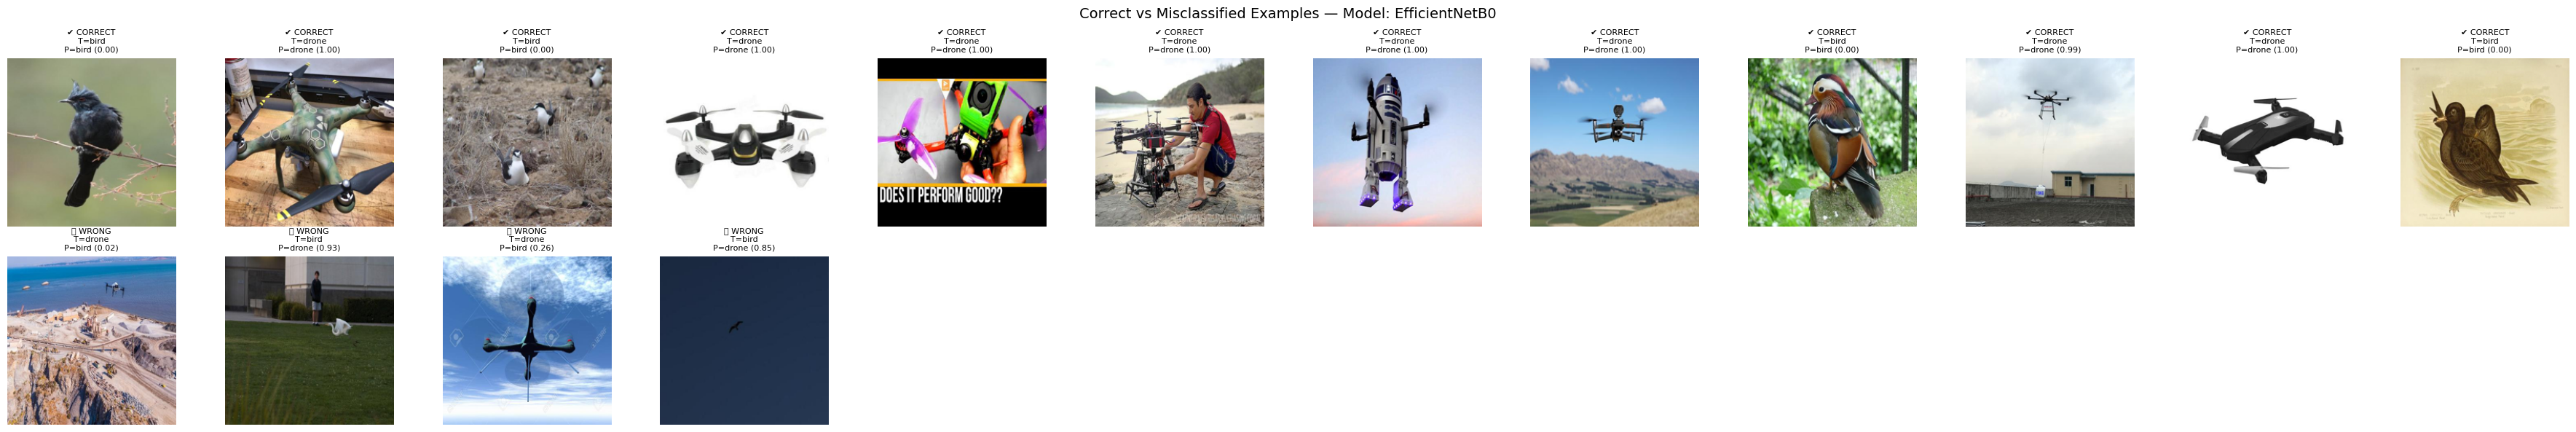

In [61]:

import random
# REQUIREMENTS:
# - test_generator, y_true, y_pred, y_prob, filepaths, inv_map must exist
# If not, reconstruct from earlier cells (this depends on 7.2)

# Parameters:
NUM_EXAMPLES = 12   # number of correct & wrong samples to show
IMG_SIZE = (224, 224)

# Identify correct & incorrect indices
correct_idx = [i for i in range(len(y_true)) if y_true[i] == y_pred[i]]
wrong_idx   = [i for i in range(len(y_true)) if y_true[i] != y_pred[i]]

print(f"Total correct predictions: {len(correct_idx)}")
print(f"Total misclassified: {len(wrong_idx)}")

# Sample some examples
correct_samples = random.sample(correct_idx, min(NUM_EXAMPLES, len(correct_idx)))
wrong_samples   = random.sample(wrong_idx, min(NUM_EXAMPLES, len(wrong_idx)))

# Display grid: correct on top, wrong on bottom
rows = 2
cols = NUM_EXAMPLES

plt.figure(figsize=(cols * 3, rows * 3))

# ---- TOP ROW: Correct Predictions ----
for i, idx in enumerate(correct_samples):
    ax = plt.subplot(rows, cols, i + 1)
    img = Image.open(filepaths[idx]).convert("RGB").resize(IMG_SIZE)

    true_label = inv_map[y_true[idx]]
    pred_label = inv_map[y_pred[idx]]
    prob = y_prob[idx]

    ax.imshow(img)
    ax.axis("off")
    ax.set_title(
        f"✔ CORRECT\nT={true_label}\nP={pred_label} ({prob:.2f})",
        fontsize=8
    )

# ---- BOTTOM ROW: Misclassified Predictions ----
offset = NUM_EXAMPLES
for i, idx in enumerate(wrong_samples):
    ax = plt.subplot(rows, cols, offset + i + 1)
    img = Image.open(filepaths[idx]).convert("RGB").resize(IMG_SIZE)

    true_label = inv_map[y_true[idx]]
    pred_label = inv_map[y_pred[idx]]
    prob = y_prob[idx]

    ax.imshow(img)
    ax.axis("off")
    ax.set_title(
        f"❌ WRONG\nT={true_label}\nP={pred_label} ({prob:.2f})",
        fontsize=8
    )

plt.suptitle("Correct vs Misclassified Examples — Model: " + chosen_model, fontsize=14)
plt.tight_layout()
plt.show()